In [1]:
# %matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os 
import math
from tqdm import tqdm
import Util as ut
import seaborn as sns
from DataLoader import GetSpectrum
import itertools

import TrackFreq

tf = TrackFreq.TrackingFrequently()

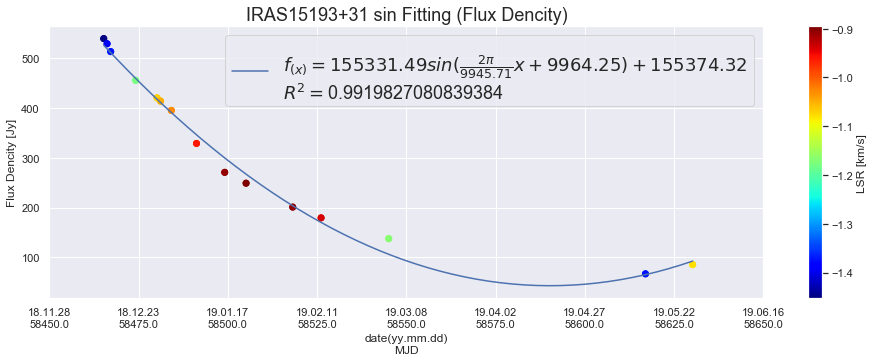

IRAS15193+31 sin Fitting (Flux Dencity)
R^2 = 0.9919827080839384
T   = 9945.70632593843 [day]
    = 27.229859893055252 [year]


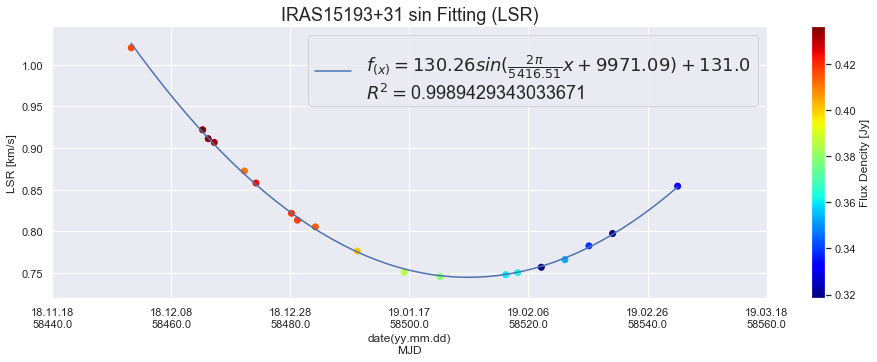

IRAS15193+31 sin Fitting (LSR)
R^2 = 0.9989429343033671
T   = 5416.513130498489 [day]
    = 14.82960473784665 [year]


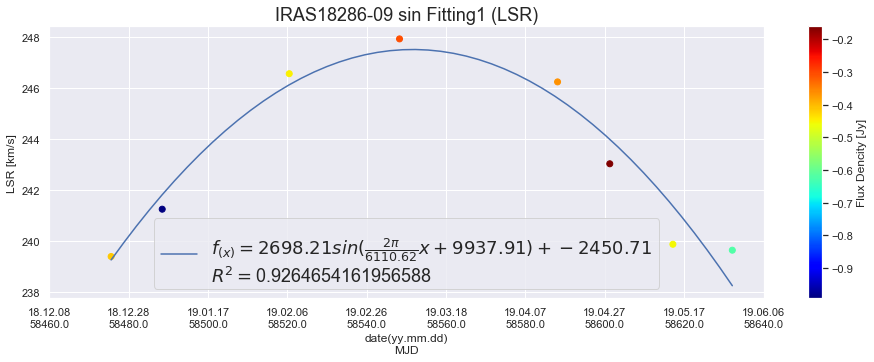

IRAS18286-09 sin Fitting1 (LSR)
R^2 = 0.9264654161956588
T   = 6110.618032894578 [day]
    = 16.729960391224033 [year]


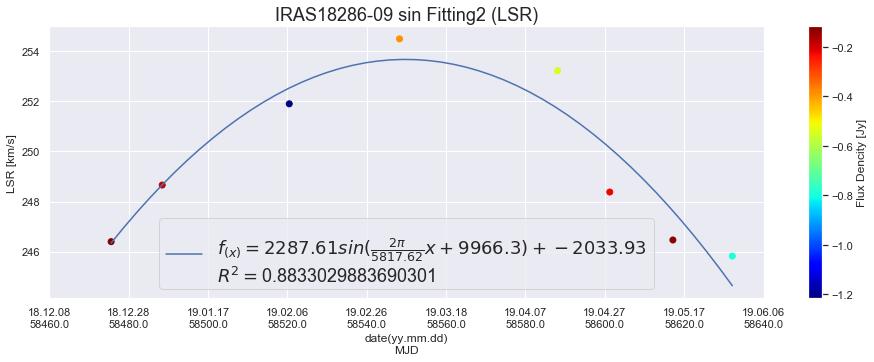

IRAS18286-09 sin Fitting2 (LSR)
R^2 = 0.8833029883690301
T   = 5817.622504834938 [day]
    = 15.927782354099762 [year]


In [2]:

def fit(x_label, y_label, c_label, point, ini, title, plot_flag = True):

    tf.d = [2]
    tf.ini = np.array(ini)
    tf.maxfev = 100000

    sns.set()
    tf.a = point

    raw_x = [tf.a[i][0] for i in range(0, len(tf.a))]
    raw_y = [tf.a[i][1] for i in range(0, len(tf.a))]
    raw_c = [math.log10(math.fabs(tf.a[i][2])) for i in range(0, len(tf.a))]



    x1, y1, l1, a, b, c, d, r2 = tf.sin_fit()
    if plot_flag:
        fig = plt.figure(figsize = (16,5))

        ax = fig.add_subplot(1,1,1)
        ax.set_title(title, fontsize=18)
        im = ax.scatter(raw_x, raw_y, c = raw_c, cmap='jet')
        ax.plot(x1, y1, label = l1 + '\n$R^2 = $' + str(r2))
        ax.legend(fontsize=18)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        cbar = plt.colorbar(im)
        cbar.set_label(c_label)


        plt.xticks(list(plt.xticks())[0], [ut.mjd2datetime(int(s)).strftime("%y.%m.%d") + '\n' + str(s) for s in list(plt.xticks())[0]])
        plt.show()
#     fig.savefig('/Users/yhamae/Desktop/' + title + '.eps')
    return r2, a, b, c, d, 

point = [[58465.259884259256, 539.7006744987871, -0.035287144252557905], [58465.259884259256, 539.7006744987871, -0.035287144252557905], [58466.194340277776, 529.3931191920942, -0.040361907727885914], [58466.194340277776, 529.3931191920942, -0.040361907727885914], [58467.20201388889, 513.5919618598095, -0.04249453090340452], [58467.20201388889, 513.5919618598095, -0.04249453090340452], [58474.21084490741, 455.8233270744233, -0.06647663043504333], [58474.21084490741, 455.8233270744233, -0.06647663043504333], [58480.18274305556, 420.5223786857531, -0.08528691382580872], [58480.18274305556, 420.5223786857531, -0.08528691382580872], [58481.17805555555, 413.9575165803784, -0.08965436055765826], [58481.17805555555, 413.9575165803784, -0.08965436055765826], [58484.19122685185, 395.3251962905485, -0.09397848422509583], [58484.19122685185, 395.3251962905485, -0.09397848422509583], [58491.23554398148, 328.9201354913216, -0.10992032189082547], [58491.23554398148, 328.9201354913216, -0.10992032189082547], [58499.13180555555, 270.7964063662952, -0.12444391986335092], [58499.13180555555, 270.7964063662952, -0.12444391986335092], [58505.11449074074, 248.9703432221043, -0.12737495468410054], [58505.11449074074, 248.9703432221043, -0.12737495468410054], [58518.17668981481, 200.92743956170818, -0.12468824881594766], [58518.17668981481, 200.92743956170818, -0.12468824881594766], [58526.119571759256, 179.26611559977414, -0.11574283324268271], [58526.119571759256, 179.26611559977414, -0.11574283324268271], [58545.0568287037, 137.42179406264086, -0.06839301375650783], [58545.0568287037, 137.42179406264086, -0.06839301375650783], [58616.95606481482, 66.68512879394144, 0.04245708811501193], [58616.95606481482, 66.68512879394144, 0.04245708811501193], [58630.162465277775, 85.22087685754504, -0.08365521569331684], [58630.162465277775, 85.22087685754504, -0.08365521569331684]]
ini = [1,10000,10000,1]
r2, a, b, c, d,  = fit('date(yy.mm.dd)\nMJD', 'Flux Dencity [Jy]', 'LSR [km/s]', point, ini, 'IRAS15193+31 sin Fitting (Flux Dencity)')
print('IRAS15193+31 sin Fitting (Flux Dencity)')
print('R^2 = ' + str(r2))
print('T   = ' + str(b) + ' [day]')
print('    = ' + str(b / 365.25) + ' [year]')


point = [[58453.25613425926, 1.0203914880799, 2.6129784132890133], [58465.259884259256, 0.9219616484515, 2.732152960831414], [58466.194340277776, 0.9112511560127, 2.7237782922423888], [58467.20201388889, 0.9067873837402, 2.7106182180451284], [58472.274143518516, 0.8725093157649, 2.579231765547459], [58474.21084490741, 0.8580712866497, 2.658796546733937], [58480.18274305556, 0.8216996200807, 2.6237891123363726], [58481.17805555555, 0.8134776763866, 2.61695577285656], [58484.19122685185, 0.8054183421677, 2.5969544952466523], [58491.23554398148, 0.7763895443571, 2.517090460485096], [58499.13180555555, 0.7508550052314, 2.4326428966983222], [58505.11449074074, 0.7458045787495, 2.3961476180111365], [58516.18938657407, 0.7480062703814, 2.2938034321388137], [58518.17668981481, 0.7504327018651, 2.3030392500209675], [58522.15048611111, 0.7569260032782, 2.083971796497942], [58526.119571759256, 0.7660500879233, 2.2534982081415227], [58530.152708333335, 0.7825891604086, 2.1835124894390967], [58534.134780092594, 0.7973996882329, 2.0819790803921623], [58545.0568287037, 0.8542932723148, 2.138055614023105], [58616.95606481482, 1.1026992726627, 1.8240289942940868], [58617.925104166665, 1.1106293622168, 1.8215901932889482]]
ini = [1,10000,10000,1]
r2, a, b, c, d,  = fit('date(yy.mm.dd)\nMJD', 'LSR [km/s]', 'Flux Dencity [Jy]', point[0:-2], ini, 'IRAS15193+31 sin Fitting (LSR)')
print('IRAS15193+31 sin Fitting (LSR)')
print('R^2 = ' + str(r2))
print('T   = ' + str(b) + ' [day]')
print('    = ' + str(b / 365.25) + ' [year]')

point = [[58475.57439814815, 239.3992630695082, 0.3860617619080613], [58488.450694444444, 241.251420168704, -0.10203064299870895], [58520.46325231482, 246.5561402479809, 0.35731493879875653], [58548.25373842593, 247.9179939762733, 0.4954320165571811], [58588.08284722222, 246.2349372619272, 0.43358452604452014], [58601.24428240741, 243.0298579059985, 0.6910977633545875], [58617.147372685184, 239.8787757713929, 0.3513508909672161], [58632.124768518515, 239.6467537349964, 0.2400109579849187]]
ini = [1,10000,10000,1]
r2, a, b, c, d,  = fit('date(yy.mm.dd)\nMJD', 'LSR [km/s]', 'Flux Dencity [Jy]', point, ini, 'IRAS18286-09 sin Fitting1 (LSR)')
print('IRAS18286-09 sin Fitting1 (LSR)')
print('R^2 = ' + str(r2))
print('T   = ' + str(b) + ' [day]')
print('    = ' + str(b / 365.25) + ' [year]')

point = [[58475.57439814815, 246.3948171259776, 0.7642964717750251], [58488.450694444444, 248.6583114629874, -0.6529137922638033], [58520.46325231482, 251.9052956706391, -0.06076305166489691], [58548.25373842593, 254.5008778420971, -0.4135359869999559], [58588.08284722222, 253.2292228959094, -0.285159408449887], [58601.24428240741, 248.3784796491791, 0.6009296534057279], [58617.147372685184, 246.4617956709382, 0.7472484137686789], [58632.124768518515, 245.8184557142526, -0.16080501818122456]]
ini = [1,10000,10000,1]
r2, a, b, c, d,  = fit('date(yy.mm.dd)\nMJD', 'LSR [km/s]', 'Flux Dencity [Jy]', point, ini, 'IRAS18286-09 sin Fitting2 (LSR)')
print('IRAS18286-09 sin Fitting2 (LSR)')
print('R^2 = ' + str(r2))
print('T   = ' + str(b) + ' [day]')
print('    = ' + str(b / 365.25) + ' [year]')

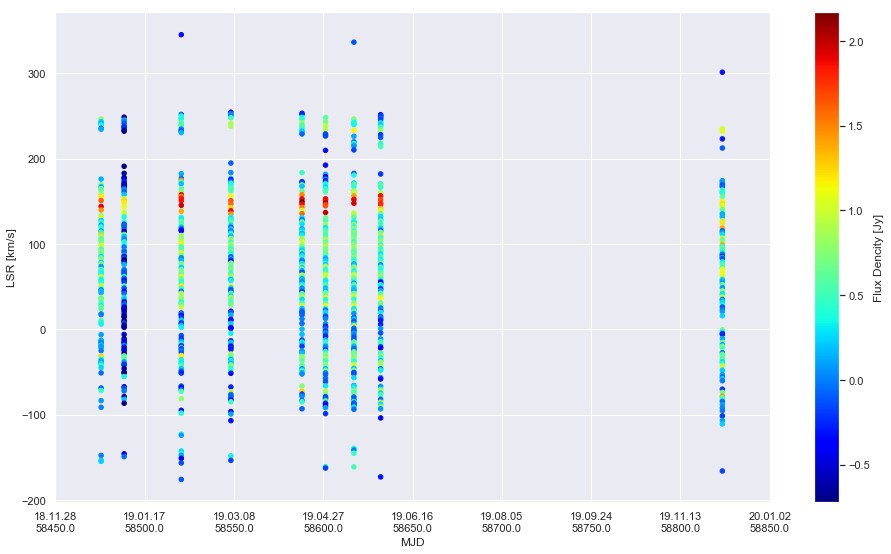

In [3]:


# source_list = ['IRAS15193+31', 'H2O']
source_list = ['IRAS18286-09', 'H2O']
tf.oname = os.path.join("/Users/yhamae/OneDrive/astro/FLASHING/dynamic_spectrum/" + source_list[0] + '_' + source_list[1] + '.txt')

data = GetSpectrum.load_file(tf.oname)
# print(data)
mjd = [float(data[i][0]) for i in range(0, len(data))]
lsr = [float(data[i][1]) for i in range(0, len(data))]
flux = [math.log10(float(data[i][2])) for i in range(0, len(data))]

# fig = plt.figure(figsize = (16,32 ))
fig = plt.figure(figsize = (16,9 ))
ax1 = fig.add_subplot(1,1,1)
im = ax1.scatter(mjd, lsr, c = flux, cmap = 'jet', s = 20)
# plt.ylim(135,160)
plt.xticks(list(plt.xticks())[0], [ut.mjd2datetime(int(s)).strftime("%y.%m.%d") + '\n' + str(s) for s in list(plt.xticks())[0]])
ax1.set_ylabel('LSR [km/s]')
ax1.set_xlabel('MJD')
cbar = plt.colorbar(im)
cbar.set_label('Flux Dencity [Jy]')


plt.show()

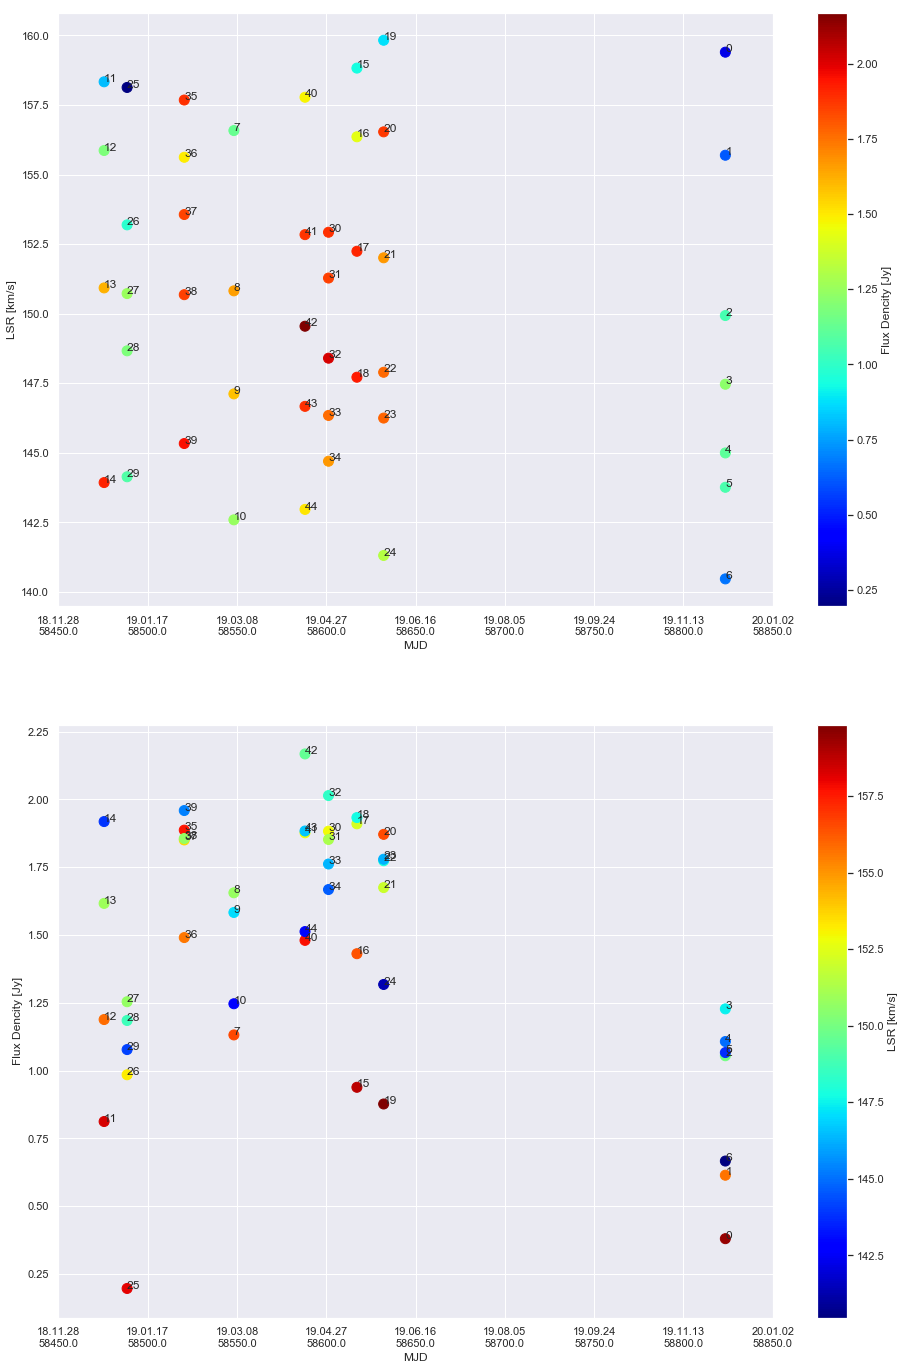

In [4]:
from mpl_toolkits.mplot3d import Axes3D

def sep_data(min_val, max_val):
    lim_data = []
    for lists in data:

        if min_val < float(lists[1]) < max_val:
            lim_data.append(lists)
    return lim_data
# lim_data = sep_data(125, 170)
lim_data = sep_data(140, 160)
# lim_data = sep_data(-100, 100)
mjd = [float(lim_data[i][0]) for i in range(0, len(lim_data))]
lsr = [float(lim_data[i][1]) for i in range(0, len(lim_data))]
flux = [math.log10(float(lim_data[i][2])) for i in range(0, len(lim_data))]

# fig = plt.figure(figsize = (16,32 ))
fig = plt.figure(figsize = (16,24 ))
ax1 = fig.add_subplot(2,1,1)
im = ax1.scatter(mjd, lsr, c = flux, cmap = 'jet', s = 100)
# plt.ylim(130,160)
plt.xticks(list(plt.xticks())[0], [ut.mjd2datetime(int(s)).strftime("%y.%m.%d") + '\n' + str(s) for s in list(plt.xticks())[0]])
ax1.set_ylabel('LSR [km/s]')
ax1.set_xlabel('MJD')
cbar = plt.colorbar(im)
cbar.set_label('Flux Dencity [Jy]')

for i in range(len(mjd)):
    ax1.annotate(str(i), xy=(mjd[i], lsr[i]))
    
ax1 = fig.add_subplot(2,1,2)
im = ax1.scatter(mjd, flux, c = lsr, cmap = 'jet', s = 100)
# plt.ylim(130,160)
plt.xticks(list(plt.xticks())[0], [ut.mjd2datetime(int(s)).strftime("%y.%m.%d") + '\n' + str(s) for s in list(plt.xticks())[0]])
ax1.set_ylabel('Flux Dencity [Jy]')
ax1.set_xlabel('MJD')
cbar = plt.colorbar(im)
cbar.set_label('LSR [km/s]')

for i in range(len(mjd)):
    ax1.annotate(str(i), xy=(mjd[i], flux[i]))
# ax2 = fig.add_subplot(2,1,2,  projection='3d')
# ax2.scatter(mjd, lsr, flux)

plt.show()   

def sep_date(data):
    tmp = {}
    for lists in data:
        if not float(lists[0]) in tmp.keys():
            tmp[float(lists[0])] = [[float(lists[0]), float(lists[1]), float(lists[2])]]
        else:
            tmp[float(lists[0])].append([float(lists[0]), float(lists[1]), float(lists[2])])
    return tmp
data = sep_date(lim_data)
# print(data)

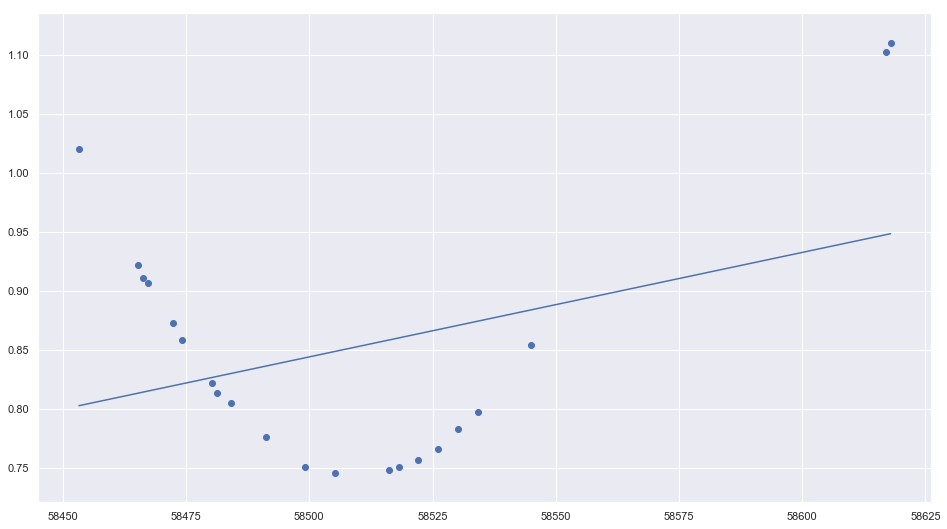

0.1278479126016695


In [7]:
point = [[58453.25613425926, 1.0203914880799, 2.6129784132890133], [58465.259884259256, 0.9219616484515, 2.732152960831414], [58466.194340277776, 0.9112511560127, 2.7237782922423888], [58467.20201388889, 0.9067873837402, 2.7106182180451284], [58472.274143518516, 0.8725093157649, 2.579231765547459], [58474.21084490741, 0.8580712866497, 2.658796546733937], [58480.18274305556, 0.8216996200807, 2.6237891123363726], [58481.17805555555, 0.8134776763866, 2.61695577285656], [58484.19122685185, 0.8054183421677, 2.5969544952466523], [58491.23554398148, 0.7763895443571, 2.517090460485096], [58499.13180555555, 0.7508550052314, 2.4326428966983222], [58505.11449074074, 0.7458045787495, 2.3961476180111365], [58516.18938657407, 0.7480062703814, 2.2938034321388137], [58518.17668981481, 0.7504327018651, 2.3030392500209675], [58522.15048611111, 0.7569260032782, 2.083971796497942], [58526.119571759256, 0.7660500879233, 2.2534982081415227], [58530.152708333335, 0.7825891604086, 2.1835124894390967], [58534.134780092594, 0.7973996882329, 2.0819790803921623], [58545.0568287037, 0.8542932723148, 2.138055614023105], [58616.95606481482, 1.1026992726627, 1.8240289942940868], [58617.925104166665, 1.1106293622168, 1.8215901932889482]]
tf = TrackFreq.TrackingFrequently()
tf.a = point
tf.d = [1]
x, xres, labels, p1, res = tf.linear_fit()
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(1,1,1)
ax.scatter([lis[0] for lis in point], [lis[1] for lis in point])
tmp = []
for val in x:
    tmp.append(p1[0] * val + p1[1])
ax.plot(x, xres)
plt.show()
print(res)